# Robotic Arm Simulator - Data Analysis
*Generated on 2025-06-01 18:08:45*

This notebook analyzes interaction and performance data from the robotic arm simulator.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
sns.set(style='whitegrid')

In [4]:
file_path = '/Users/alifathi/Desktop/Spring/robotic-arm-simulator/results.csv'
df = pd.read_csv(file_path)
df.head()

ParserError: Error tokenizing data. C error: Expected 5 fields in line 8, saw 9


In [7]:
import pandas as pd

file_path = '/Users/alifathi/Desktop/Spring/robotic-arm-simulator/results.csv'

rich_rows = []

with open(file_path, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines[1:]):  # skip header
    parts = line.strip().split(',')
    if len(parts) == 9:
        try:
            ts, x, y, theta1, theta2, mode, errx, erry, success = parts
            rich_rows.append({
                'Timestamp': pd.to_datetime(ts),
                'X': float(x),
                'Y': float(y),
                'Theta1': float(theta1),
                'Theta2': float(theta2),
                'Mode': mode,
                'ErrorX': float(errx),
                'ErrorY': float(erry),
                'Success': success == 'True'
            })
        except ValueError as e:
            print(f"Skipping malformed row {i+2}: {e} → {parts}")

# Create DataFrame from fully detailed rows only
df_full = pd.DataFrame(rich_rows)

# Display preview
df_full.head()



Skipping malformed row 72: Given date string "12.0" not likely a datetime, at position 0 → ['12.0', '2.0', '-77.05', '173.03', 'True', '2025-06-01T11:20:20.058868', 'Form', '0.03', '0.0']
Skipping malformed row 73: Given date string "12.0" not likely a datetime, at position 0 → ['12.0', '2.0', '-77.05', '173.03', 'True', '2025-06-01T11:20:28.062686', 'Form', '0.03', '0.0']
Skipping malformed row 74: Given date string "50.0" not likely a datetime, at position 0 → ['50.0', '6.0', '-68.57', '150.83', 'True', '2025-06-01T11:20:37.882785', 'Form', '0.01', '0.0']


,Timestamp,X,Y,Theta1,Theta2,Mode,ErrorX,ErrorY,Success
0,2025-06-01 10:44:18.235260,14.0,40.0,-7.06,155.53,Form,0.0,0.0,True
1,2025-06-01 10:44:26.165774,45.0,35.5,-35.08,146.69,Form,0.0,0.0,True
2,2025-06-01 10:44:31.000593,12.0,-10.0,-125.33,171.04,Form,0.0,0.0,True
3,2025-06-01 10:44:35.933653,-10.0,12.0,44.29,171.04,Form,0.0,0.0,True
4,2025-06-01 10:44:43.648041,54.0,-87.0,-117.38,118.41,Form,0.0,0.0,True


In [8]:
# Convert Timestamp column if available
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Date'] = df['Timestamp'].dt.date

In [9]:
# Calculate DistanceError if not present
if 'DistanceError' not in df.columns and {'X', 'Y', 'Theta1', 'Theta2'}.issubset(df.columns):
    L1 = L2 = 100  # arm lengths
    theta1_rad = np.radians(df['Theta1'])
    theta2_rad = np.radians(df['Theta2'])
    x_pred = L1 * np.cos(theta1_rad) + L2 * np.cos(theta1_rad + theta2_rad)
    y_pred = L1 * np.sin(theta1_rad) + L2 * np.sin(theta1_rad + theta2_rad)
    df['DistanceError'] = np.sqrt((df['X'] - x_pred)**2 + (df['Y'] - y_pred)**2)
df.head()

,Timestamp,X,Y,Theta1,Theta2,Mode,ErrorX,ErrorY,Success,Date,DistanceError
0,NaT,99.0,40.0,-35.73,115.46,None,NaN,NaN,True,NaT,0.006604
1,NaT,20.0,40.0,-13.64,154.16,None,NaN,NaN,True,NaT,0.005134
2,NaT,60.0,70.0,-13.15,125.10,None,NaN,NaN,True,NaT,0.002160
3,NaT,100.0,100.0,0.00,90.00,None,NaN,NaN,True,NaT,0.000000
4,NaT,20.0,10.0,-57.02,167.16,None,NaN,NaN,True,NaT,0.003171


## Execution Time Distribution
Understanding how fast the system responds to user input.

In [10]:
if 'ExecutionTime' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['ExecutionTime'], kde=True, color='skyblue')
    plt.title('Execution Time Distribution')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency')
    plt.show()

## Distance Error Visualization
Evaluating how closely the arm reaches the target point.

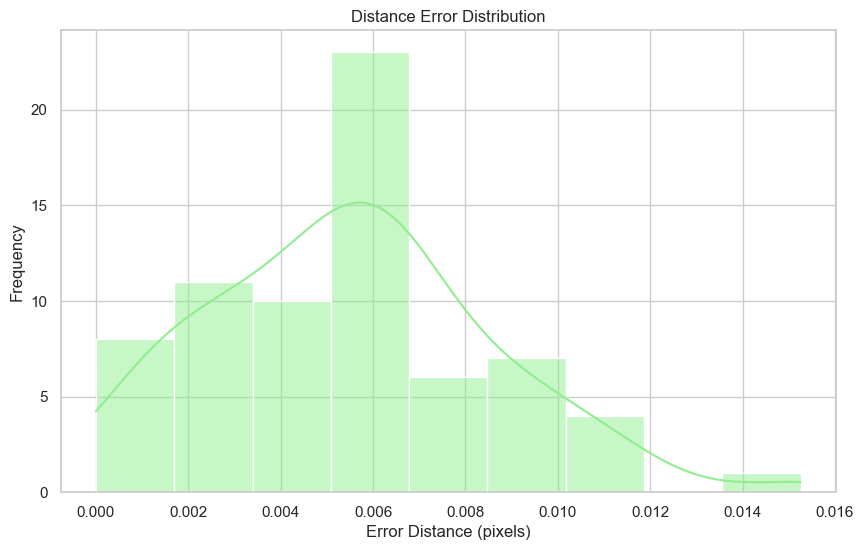

In [11]:
if 'DistanceError' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['DistanceError'], kde=True, color='lightgreen')
    plt.title('Distance Error Distribution')
    plt.xlabel('Error Distance (pixels)')
    plt.ylabel('Frequency')
    plt.show()

## Interaction Type Usage
Comparing number of requests from Form vs API.

In [12]:
if 'InteractionType' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='InteractionType', palette='pastel')
    plt.title('Form vs API Usage')
    plt.xlabel('Interaction Type')
    plt.ylabel('Count')
    plt.show()

## Execution Time Over Time
Analyzing how execution time varies day by day.

In [13]:
if 'Date' in df.columns and 'ExecutionTime' in df.columns:
    daily_avg = df.groupby('Date')['ExecutionTime'].mean()
    plt.figure(figsize=(10, 5))
    daily_avg.plot(marker='o')
    plt.title('Average Execution Time per Day')
    plt.xlabel('Date')
    plt.ylabel('Avg Execution Time (s)')
    plt.grid(True)
    plt.show()